# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [2]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data.Gender == 'Male']
female_df =  data.loc[data.Gender == 'Female']

means = data.groupby(data.Gender).mean()
stds = data.groupby(data.Gender).std()
stats_df = pd.concat([means, stds], axis=1)
stats_df.columns = ['Mean Height', 'Mean Weight', 'Height Std', 'Weight Std']
stats_df
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

,Mean Height,Mean Weight,Height Std,Weight Std
Gender,,,,
Female,63.708774,135.860093,2.696284,19.022468
Male,69.026346,187.020621,2.863362,19.781155


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

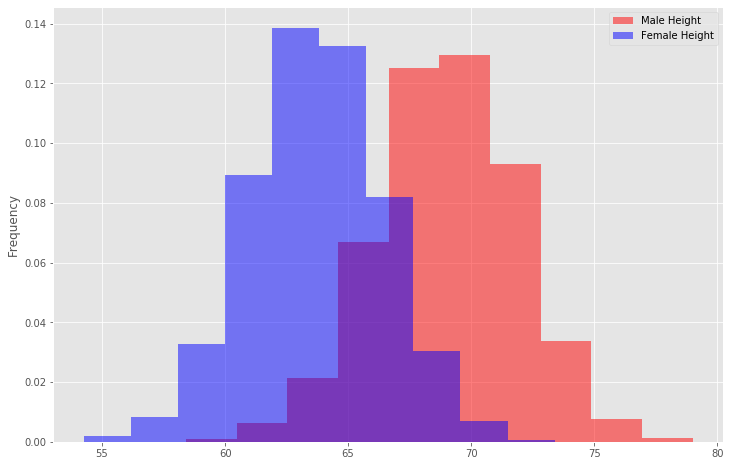

In [33]:
plt.figure(figsize=(12,8))
plt.hist(male_df.Height, 
         bins=10, 
         alpha=.5, 
         color='red', 
         label='Male Height',
         density=True,)
plt.hist(female_df.Height, 
         bins=10, 
         alpha=.5, 
         color='blue', 
         label='Female Height',
         density=True)
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [4]:
# Record your observations - are these inline with your personal observations?
# This data does seem to reflect what I've seen. The male height is centered around just under 6
# feet (69"), and the female height is just over 5 foot at 63"

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

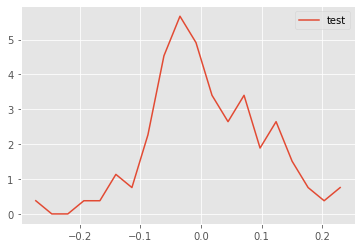

In [5]:
def density(x):
    
    n, bins = np.histogram(x, bins=20, density=True)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for i in range(n.size):
        pdfx[i] = (bins[i] + bins[i+1])/2
        pdfy[i] = n[i]
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()
plt.show()

## Add overlapping density plots to the histograms plotted earlier

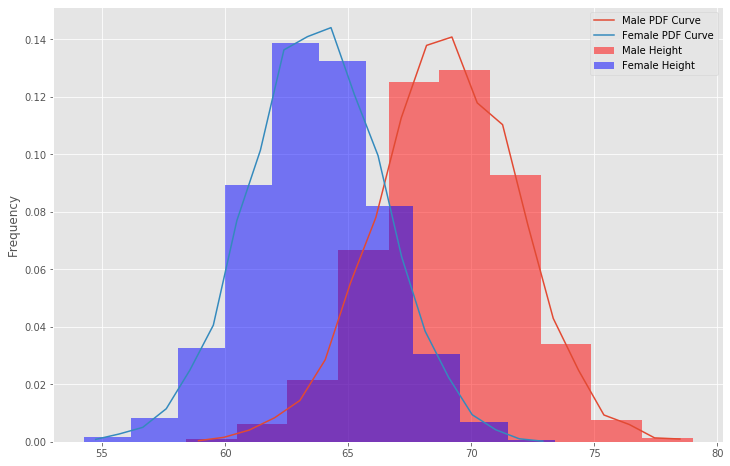

In [8]:
plt.figure(figsize=(12,8))
plt.hist(male_df.Height, 
         bins=10, 
         alpha=.5, 
         color='red', 
         label='Male Height',
         density=True,)
plt.hist(female_df.Height, 
         bins=10, 
         alpha=.5, 
         color='blue', 
         label='Female Height',
         density=True)
male_x, male_y = density(male_df.Height)
female_x, female_y = density(female_df.Height)
plt.plot(male_x, male_y, label='Male PDF Curve')
plt.plot(female_x, female_y, label='Female PDF Curve')
plt.ylabel('Frequency')
plt.legend()
plt.show();

## Repeat the above exercise for male and female weights

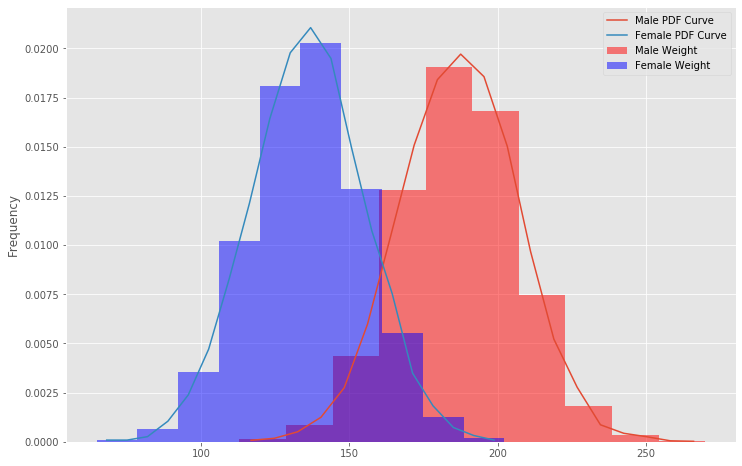

In [9]:
plt.figure(figsize=(12,8))
plt.hist(male_df.Weight, 
         bins=10, 
         alpha=.5, 
         color='red', 
         label='Male Weight',
         density=True,)
plt.hist(female_df.Weight, 
         bins=10, 
         alpha=.5, 
         color='blue', 
         label='Female Weight',
         density=True)
male_x, male_y = density(male_df.Weight)
female_x, female_y = density(female_df.Weight)
plt.plot(male_x, male_y, label='Male PDF Curve')
plt.plot(female_x, female_y, label='Female PDF Curve')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Write your observations in the cell below

In [10]:
# Record your observations - are these inline with your personal observations?
# Again, the data is in line with what I've seen in my life. Females are lighter than males 
# in general, though there is some overlap.

# What is the takeaway when comparing male and female heights and weights?
# The curves show that the mean heights and weignts of males are larger in general, but the 
# tails of the two curves overlap showing that some females are larger than some men. 
# The standard deviations are similar between the genders.

## Repeat the above experiments in seaborn and compare with your results

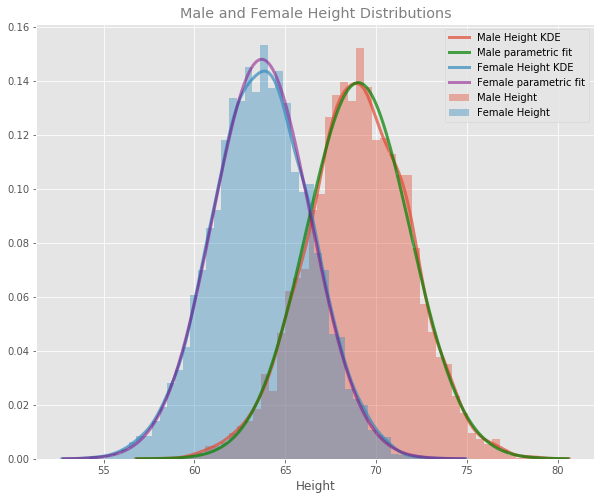

In [28]:
# Code for heights here
import scipy.stats as stats
import seaborn as sns

fig, ax = plt.subplots(1, 
                              figsize = (10,8) )

sns.distplot(male_df.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "alpha": 0.4, 
                                  "label": "Male Height",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  "alpha": 0.7,
                                  'label':'Male Height KDE'
                                 },
             fit= stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'Male parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax)
sns.distplot(female_df.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "alpha": 0.4, 
                                  "label": "Female Height",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  "alpha": 0.7,
                                  'label':'Female Height KDE'
                                 },
             fit= stats.norm, fit_kws = {'color' : 'purple',
                                         'label' : 'Female parametric fit',
                                         "alpha": 0.5,
                                          'linewidth':3},
             ax=ax)
plt.setp(ax.set_title('Male and Female Height Distributions'), color='gray')
plt.legend();

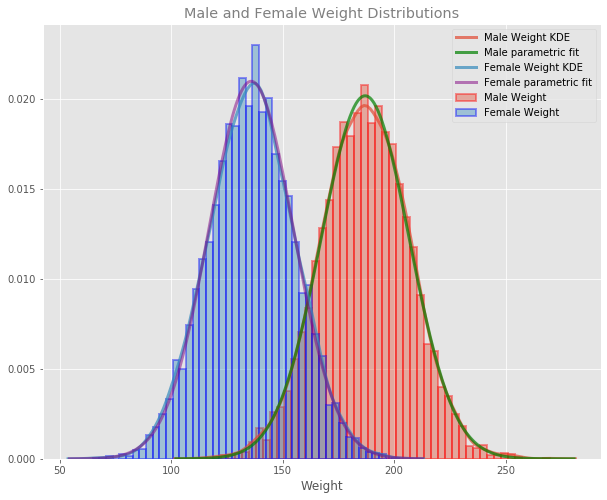

In [31]:
fig, ax = plt.subplots(1, 
                              figsize = (10,8) )

sns.distplot(male_df.Weight, 
             hist=True, hist_kws={"edgecolor": "red",
                                  "linewidth": 2,
                                  "alpha": 0.4, 
                                  "label": "Male Weight",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  "alpha": 0.7,
                                  'label':'Male Weight KDE'
                                 },
             fit= stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'Male parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax)
sns.distplot(female_df.Weight, 
             hist=True, hist_kws={"edgecolor": "blue",
                                  "linewidth": 2,
                                  "alpha": 0.4, 
                                  "label": "Female Weight",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  "alpha": 0.7,
                                  'label':'Female Weight KDE'
                                 },
             fit= stats.norm, fit_kws = {'color' : 'purple',
                                         'label' : 'Female parametric fit',
                                         "alpha": 0.5,
                                          'linewidth':3},
             ax=ax)
plt.setp(ax.set_title('Male and Female Weight Distributions'), color='gray')
plt.legend();

In [32]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

# The two approaches are similar, but I think that the seaborn distplot has more useful
# parameters that are conducive to creating these distribution plots. I like the fact that 
# the seaborn plots can have normal distribution curves fitted right to them, as well as the
# kde feature. Since the seaborn plots can be manipulated and arranged using the matplotlib
# axes, I think this is the route I will lean toward in the future.

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.